In [10]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
print("Tensorflow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

Tensorflow v2.13.0
TensorFlow Decision Forests v1.8.1


In [14]:
file_path = "./data/train.csv"
df = pd.read_csv(file_path)
print(f"Full train dataset shape is {df.shape}.")

Full train dataset shape is (1460, 81).


In [15]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [41]:
# Check for missing values helper function
def null_columns(df):
    """
    Display columns with missing values, the total count, and the percentage of missing values in descending order.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    None (prints text).
    """
    # Calculate the number of missing values for each column
    null_counts = df.isna().sum()

    # Calculate the percentage of missing values for each column
    null_percentage = (df.isna().sum() / len(df)) * 100

    # Combine counts and percentages into a DataFrame
    null_info = pd.DataFrame({'Count_Null': null_counts, 'Percentage': null_percentage})

    # Filter columns with missing values and sort them
    null_info = null_info[null_info['Count_Null'] > 0].sort_values(by=['Count_Null'], ascending=False)

    # Format the 'Percentage' column to two decimal places with a '%' sign
    null_info['Percentage'] = null_info['Percentage'].apply(lambda x: f"{x:.2f}%")
    
    # Display user-friendly message
    if not null_info.empty:
        print("Columns with missing values, their counts, and percentages (sorted):")
        print(null_info)
    else:
        print("No columns with missing values.")
null_columns(df)

Columns with missing values, their counts, and percentages (sorted):
              Count_Null Percentage
PoolQC              1453     99.52%
MiscFeature         1406     96.30%
Alley               1369     93.77%
Fence               1179     80.75%
FireplaceQu          690     47.26%
LotFrontage          259     17.74%
GarageType            81      5.55%
GarageYrBlt           81      5.55%
GarageFinish          81      5.55%
GarageQual            81      5.55%
GarageCond            81      5.55%
BsmtExposure          38      2.60%
BsmtFinType2          38      2.60%
BsmtFinType1          37      2.53%
BsmtCond              37      2.53%
BsmtQual              37      2.53%
MasVnrArea             8      0.55%
MasVnrType             8      0.55%
Electrical             1      0.07%


In [42]:
def duplicate_percentage(df):
    """
    Print the percentage of duplicated rows in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    None (prints texts).
    """
    dup_sum = df.duplicated().sum()
    dup_pct = (dup_sum / len(df)) * 100
    print(f'Total duplicated rows: {dup_sum: .2f}. \nPercentage of duplicated rows: {dup_pct: .2f}%')
duplicate_percentage(df)

Total duplicated rows:  0.00. 
Percentage of duplicated rows:  0.00%


In [45]:
def likelihood_analysis(df, target_col):
    """
    Perform likelihood analysis using Bayes' theorem.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - target_col (str): The column for which likelihood analysis is performed.

    Returns:
    - likelihood_df (pd.DataFrame): pandas DataFrame, showing the conditional probabilities.
    """
    # Create an empty DataFrame to store conditional probabilities
    likelihood_df = pd.DataFrame(index=df.columns, columns=df[target_col].unique())

    for col in df.columns:
        col_values = []
        for value in df[target_col].unique():
            # Calculate the conditional probability of observing 'value' given target_col, P(value | target_col)
            subset = df[df[target_col] == value][col]
            if not subset.empty:
                likelihood = subset.value_counts() / len(subset)
                col_values.append(likelihood.get(1, 0))  # Binary classification (1 is when employee has left)
            else:
                col_values.append(0)  # Handle division by zero

        likelihood_df.loc[col, :] = col_values

    likelihood_df = likelihood_df.fillna(0)  # Handle NaN values

    return likelihood_df

# Target colum is 'left'
result = likelihood_analysis(df, 'SalePrice')
result

,208500,181500,223500,140000,250000,143000,307000,200000,129900,118000,...,394617,149700,149300,121000,179600,92000,287090,266500,142125,147500
Id,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MSSubClass,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MSZoning,0.0,0.0,0.0,0.3,0.25,0.2,0.0,0.125,0.50,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LotFrontage,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LotArea,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.0,0.0,0.0,0.0,0.00,0.1,0.0,0.000,0.00,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YrSold,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SaleType,0.0,0.0,0.0,0.1,0.00,0.0,0.0,0.125,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SaleCondition,0.0,0.0,0.0,0.1,0.00,0.1,0.0,0.125,0.25,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Binary Features: 0
Object/Str Features: 43
Total Generated Boxplots: 38


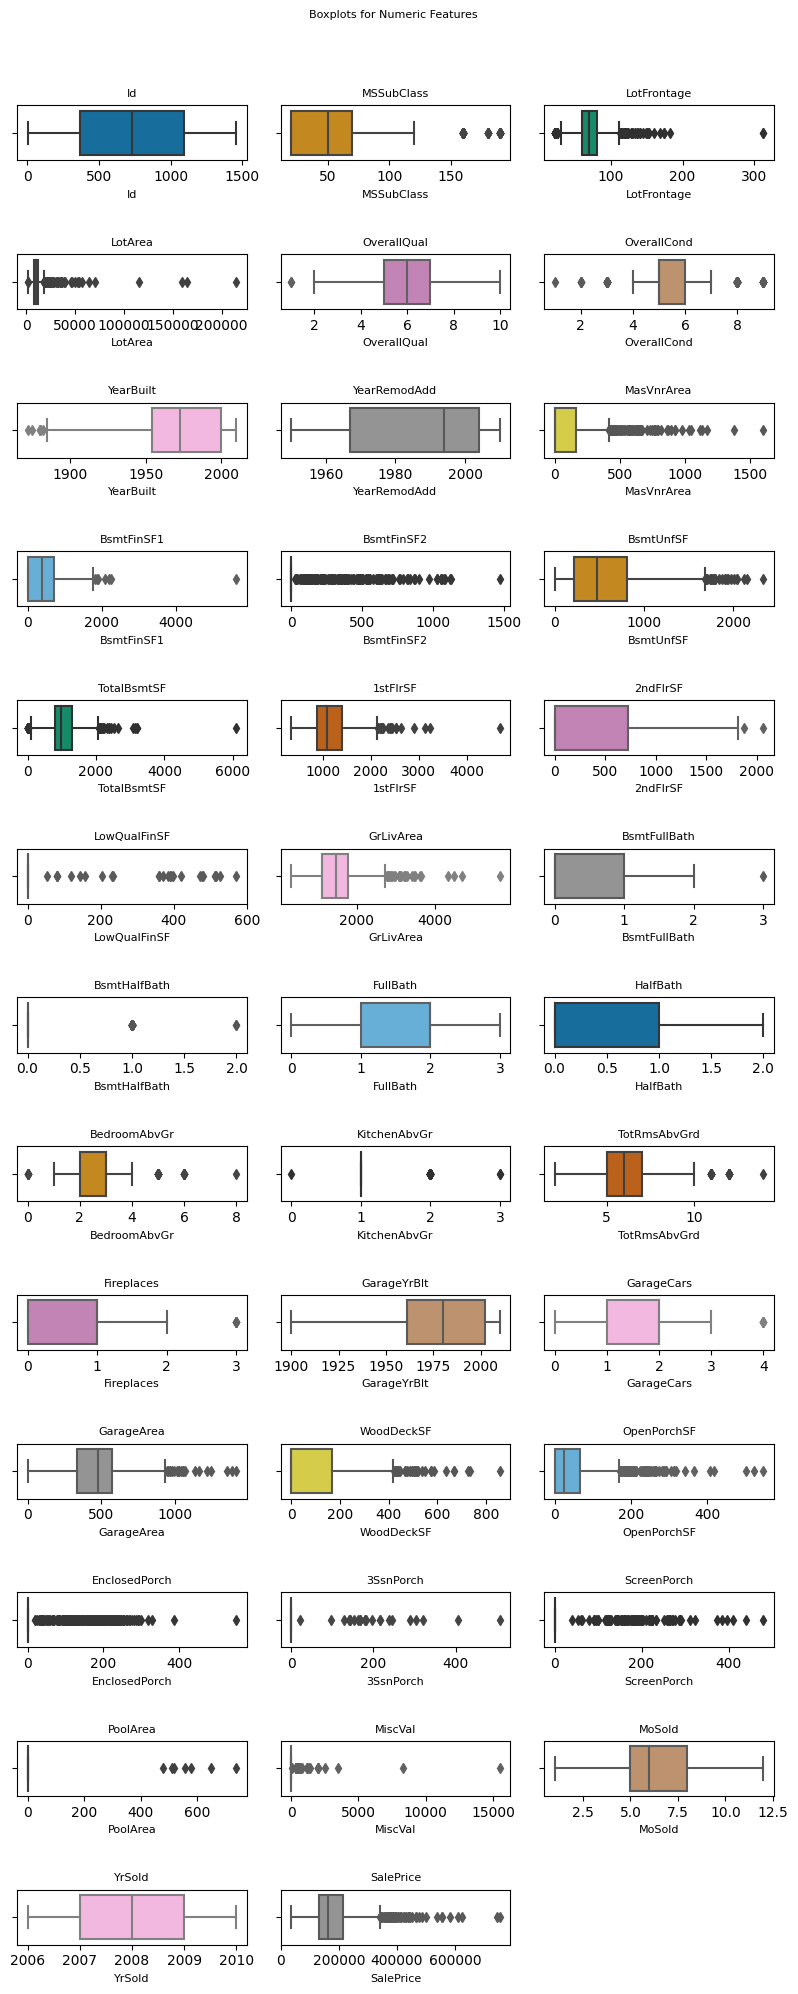

In [47]:
def create_static_boxplots(df):
    """
    Create static boxplots for non-binary and non-object features.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    None (displays the plots).
    """
    # Get non-object columns
    numeric_columns = df.select_dtypes(['float64', 'int64']).columns

    # Count the number of binary features
    num_binary_features = sum(df[col].nunique() <= 2 for col in numeric_columns)

    # Count the number of object/str features
    num_object_features = sum(df[col].dtype == 'object' for col in df.columns)

    # Define an accessible color palette
    colors = sns.color_palette("colorblind")

    # Filter out binary features
    non_binary_columns = [col for col in numeric_columns if df[col].nunique() > 2]

    # Print information about the features
    print(f'Binary Features: {num_binary_features}')
    print(f'Object/Str Features: {num_object_features}')
    print(f'Total Generated Boxplots: {len(non_binary_columns)}')
    
    # Create subplots with two boxplots per row (handle odd number of boxplots)
    num_plots = len(non_binary_columns)
    num_rows = (num_plots + 2) // 3
    fig, axes = plt.subplots(num_rows, 3, figsize=(8, 1.5 * num_rows))
    fig.suptitle("Boxplots for Numeric Features", y=1.02, fontsize=8)

    # Flatten axes array for easier indexing
    axes = axes.flatten()

    # Plot each boxplot
    for idx, col_name in enumerate(non_binary_columns):
        sns.boxplot(x=df[col_name], ax=axes[idx], color=colors[idx % len(colors)])
        axes[idx].set_title(col_name, fontsize=8)
        axes[idx].set_xlabel(col_name,fontsize=8)

    # Remove any unused subplots
    for idx in range(num_plots, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    fig.subplots_adjust(hspace=1.7)
    plt.show()

create_static_boxplots(df)